In [123]:
from datasets import load_dataset, load_from_disk, Dataset, DatasetDict, concatenate_datasets
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance


import json
import matplotlib.pyplot as plt

In [124]:
# label: true = 0, fake = 1

In [125]:
experiment_name = "qwen_test"
fake_train_dataset = load_from_disk(f"fake_true_dataset_{experiment_name}")

In [126]:
# save to json
#fake_train_dataset["train"].to_json("fake_true_dataset.json", force_ascii=True)

# load to pandas
df = pd.DataFrame(fake_train_dataset['train'])

# transform text to list by splitting on \n
df["text"] = df["text"].apply(lambda x: x.split("\n"))

# dump to json
df.to_json(f"fake_true_dataset_{experiment_name}.json", force_ascii=False, indent=4)



In [127]:
fake_train_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 11
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1
    })
})

In [128]:
fake_train_dataset['train'][0]

{'text': "Roy Hodgson has come under fire for making public Raheem Sterling's admission that he was feeling tired ahead of England's Euro 2016 qualifier with Estonia. The Liverpool star told the England manager that he was too fatigued to start the match in Tallinn after shouldering a heavy burden this season for both club and country. Hodgson then made Sterling's comments public ahead of the match, which England won 1-0 thanks to Wayne Rooney's second-half free-kick. VIDEO Scroll down to watch Roy Hodgso",
 'label': 0}

In [129]:
print(fake_train_dataset['train'][0]['text'])

Roy Hodgson has come under fire for making public Raheem Sterling's admission that he was feeling tired ahead of England's Euro 2016 qualifier with Estonia. The Liverpool star told the England manager that he was too fatigued to start the match in Tallinn after shouldering a heavy burden this season for both club and country. Hodgson then made Sterling's comments public ahead of the match, which England won 1-0 thanks to Wayne Rooney's second-half free-kick. VIDEO Scroll down to watch Roy Hodgso


In [130]:
fake_train_dataset['train'][2]

{'text': "Cover-up: Former Archbishop Lord Hope allowed a paedophile priest to escape punishment for sex crimes, a judge's report claims . A former archbishop who failed to act on alleged crimes of a paedophile priest should be jailed, the abuser’s victims have said. Lord Hope, the former Archbishop of York, did not act on 19 occasions when allegations of abuse or inappropriate conduct by the priest were raised with him, a scathing report revealed yesterday. But despite that, Lord Hope remains as an honor",
 'label': 0}

In [131]:
print(fake_train_dataset['train'][2]["text"])

Cover-up: Former Archbishop Lord Hope allowed a paedophile priest to escape punishment for sex crimes, a judge's report claims . A former archbishop who failed to act on alleged crimes of a paedophile priest should be jailed, the abuser’s victims have said. Lord Hope, the former Archbishop of York, did not act on 19 occasions when allegations of abuse or inappropriate conduct by the priest were raised with him, a scathing report revealed yesterday. But despite that, Lord Hope remains as an honor


In [132]:
" By . Hugo Gye . PUBLISHED: . 06:53 EST, 12 March 2013 . | . UPDATED: . 06:53 EST, 12".split("EST,")

[' By . Hugo Gye . PUBLISHED: . 06:53 ',
 ' 12 March 2013 . | . UPDATED: . 06:53 ',
 ' 12']

In [133]:
# transform dataset to pandas dataframe
fake_train_df = pd.DataFrame(fake_train_dataset['train'])
fake_train_df.head()

,text,label
0,Roy Hodgson has come under fire for making pub...,0
1,Roy Hodgson has come under fire for making pub...,1
2,Cover-up: Former Archbishop Lord Hope allowed ...,0
3,Every frontline police officer should be offer...,1
4,Three members of the same family who died in a...,1


In [134]:
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)))

Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


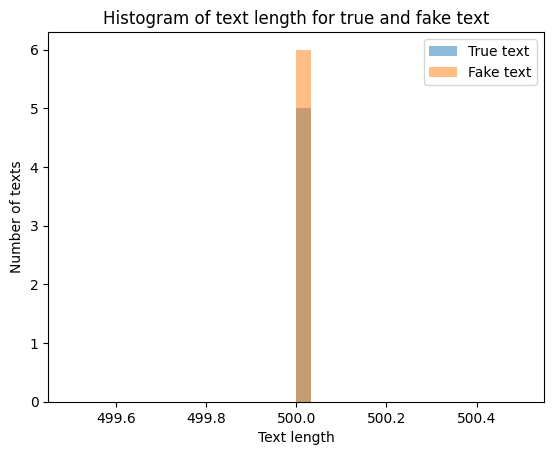

In [135]:
# show histogram of text length for true and fake text
plt.hist(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len), bins=30, alpha=0.5, label='True text')
plt.hist(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len), bins=30, alpha=0.5, label='Fake text')

# add x and y axis labels
plt.xlabel('Text length')
plt.ylabel('Number of texts')

plt.title("Histogram of text length for true and fake text")

plt.legend(loc='upper right')

In [99]:
# print text where length is greater than 2000
print(fake_train_df[fake_train_df["text"].apply(len) > 2000]["text"].values[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [100]:
print("Average number of newlines in text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(lambda x: x.count("\n"))))
print("Average number of newlines in text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(lambda x: x.count("\n"))))

Average number of newlines in text with label 0 (=True text): 0.0
Average number of newlines in text with label 1 (=Fake text): 0.0


In [83]:
fake_train_df.describe()

,label
count,16.000000
mean,0.500000
std,0.516398
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [84]:
fake_train_df[fake_train_df["label"] == 1].describe()

,label
count,8.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [62]:
fake_train_df.head(20)

,text,label
0,Instruction: \n Write a funny and whimsical h...,0
1,Instruction: \n If McDonald’s were to go out ...,1
2,Instruction: \n what is the difference betwee...,1
3,Instruction: \n Who were the children of the ...,0
4,Instruction: \n Who was the first person to d...,0
5,Instruction: \n What was most important inven...,1


In [33]:
# filter out texts with length greater than 1000
fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < 1000]
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)))


Average size of text with label 0 (=True text): 386.2857142857143
Average size of text with label 1 (=Fake text): 393.5


In [38]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


223.75

In [15]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


8.133333333333333

In [44]:
# find filtering such that wasserstein distance is minimized
wasserstein_distances = []
for i in range(300, 1000, 100):
    fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < i]
    true_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)
    fake_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)
    wasserstein_distances.append({"threshold": i, "wasserstein_distance": wasserstein_distance(true_text_lengths, fake_text_lengths)})
wasserstein_distances


[{'threshold': 300, 'wasserstein_distance': 47.666666666666664},
 {'threshold': 400, 'wasserstein_distance': 66.0},
 {'threshold': 500, 'wasserstein_distance': 76.83333333333334},
 {'threshold': 600, 'wasserstein_distance': 76.83333333333334},
 {'threshold': 700, 'wasserstein_distance': 105.22857142857144},
 {'threshold': 800, 'wasserstein_distance': 105.22857142857144},
 {'threshold': 900, 'wasserstein_distance': 100.49999999999999}]